In [382]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

In [383]:
warnings.filterwarnings('ignore')  #to ignore the warnings
%matplotlib inline

In [384]:
df= pd.read_csv('AusApparalSales4thQrt2020.csv')

In [385]:
df

Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]

In [386]:
df.columns  ##Print the columns of the DataFrame

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [461]:
df.isna() ## columns with null values

Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]

In [463]:
df.notna()

Date  Time  State  Group  Unit  Sales
0     True  True   True   True  True   True
1     True  True   True   True  True   True
2     True  True   True   True  True   True
3     True  True   True   True  True   True
4     True  True   True   True  True   True
...    ...   ...    ...    ...   ...    ...
7555  True  True   True   True  True   True
7556  True  True   True   True  True   True
7557  True  True   True   True  True   True
7558  True  True   True   True  True   True
7559  True  True   True   True  True   True

[7560 rows x 6 columns]

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [389]:
df.shape      ##Shape of dataset

(7560, 6)

In [390]:
null_count = null.sum()    ##Count of null values
null_count

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [391]:
df.memory_usage(deep = 1)  # Checking memory uses column wise

Index       128
Date     511812
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64

In [392]:
df.describe()             # Desciptive stats of the numeric data types

Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

In [393]:
# Checking for duplicates

df[df.duplicated()].count()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [394]:
# Unique Entries
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


In [395]:
# Creating a copy of the sales_data for further processing
sd =df.copy(deep = 1)

In [396]:
# Changing the column name sto lower case
sd.columns =sd.columns.str.lower()

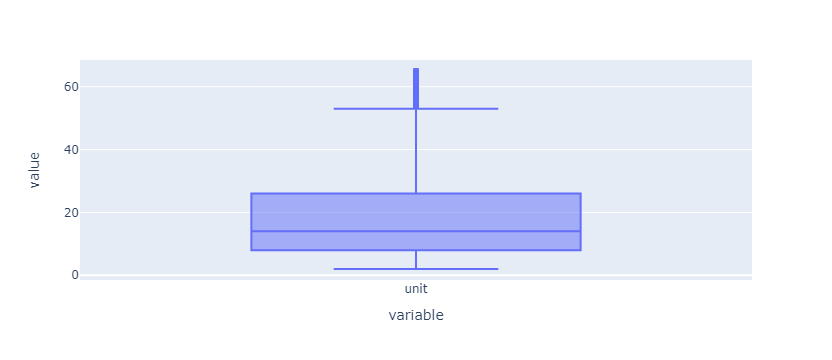

In [397]:
px.box(sd['unit'])

In [398]:
Q1 =sd['unit'].quantile(0.25)
Q3 =sd['unit'].quantile(0.75)
IQR =Q3 -Q1    #IQR is interquartile range.

filter =(sd['unit']>= Q1 - 1.5 * IQR) &(sd['unit']<= Q3 + 1.5 *IQR)
md =sd.loc[filter]

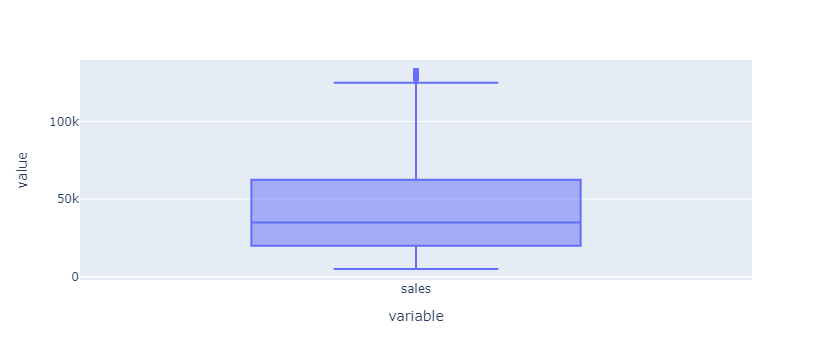

In [399]:
px.box(md['sales'])

In [400]:
# Defining Quartiles
Q1 =md['sales'].quantile(0.25)
Q3 =md['sales'].quantile(0.75)
IQR =Q3 -Q1 #IQR is interquartile range.
# Filtering data based on Quartiles
filter =(md['sales']>= Q1 - 1.5 * IQR) &(md['sales']<= Q3 + 1.5 *IQR)
md =md.loc[filter]

In [401]:
pd.DataFrame([sd.groupby('group').count()['sales'],md.groupby('group').count()['sales']],
             index =['before','after'])

group    Kids   Men   Seniors   Women
before   1890  1890      1890    1890
after    1856  1850      1851    1852

### Normalization

In [403]:
# Initialize the MinMaxScaler
scaler =MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
sd['normalized_unit']=scaler.fit_transform(sd[['unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
sd['normalized_sales']=scaler.fit_transform(sd[['sales']])

sd.describe()

unit          sales  normalized_unit  normalized_sales
count  7560.000000    7560.000000      7560.000000       7560.000000
mean     18.005423   45013.558201         0.254054          0.254054
std      12.901403   32253.506944         0.204784          0.204784
min       2.000000    5000.000000         0.000000          0.000000
25%       8.000000   20000.000000         0.095238          0.095238
50%      14.000000   35000.000000         0.190476          0.190476
75%      26.000000   65000.000000         0.380952          0.380952
max      65.000000  162500.000000         1.000000          1.000000

In [404]:
# Extracting Max and Minimum of the Sales
sd.set_index('sales').sort_index().head(1)

date      time state   group  unit  normalized_unit  \
sales                                                               
5000   26-Nov-2020   Morning    WA   Women     2              0.0   

       normalized_sales  
sales                    
5000                0.0

In [405]:
# Minimum of the Sales
sd.set_index('sales').sort_index().tail(1)

date      time state     group  unit  normalized_unit  \
sales                                                                  
162500  24-Dec-2020   Evening   VIC   Seniors    65              1.0   

        normalized_sales  
sales                     
162500               1.0

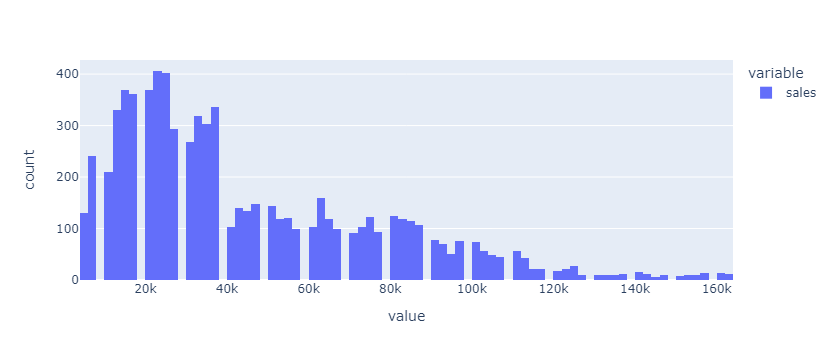

In [406]:
# Using plotly histogram for more data and interaction
sales_hist =px.histogram(sd['sales'])
sales_hist

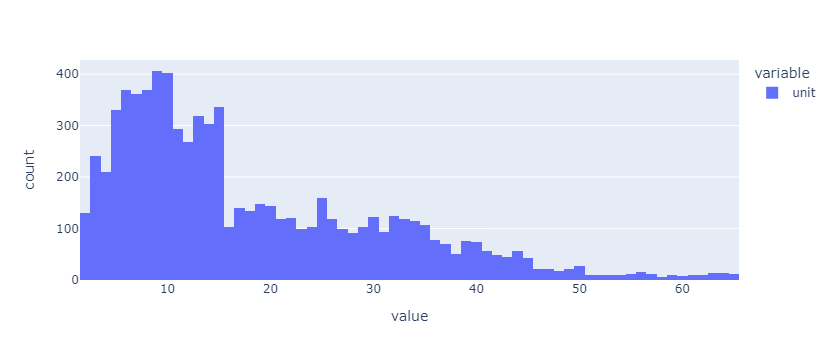

In [407]:
# Using plotly histogram for more data and interaction
unit_hist =px.histogram(sd['unit'])
unit_hist

In [408]:
print(f'>>> {162500/65}')
print(f'>>> {22500/9}')

>>> 2500.0
>>> 2500.0


<Axes: title={'center': 'Sales by State Graph'}, xlabel='state', ylabel='sales'>

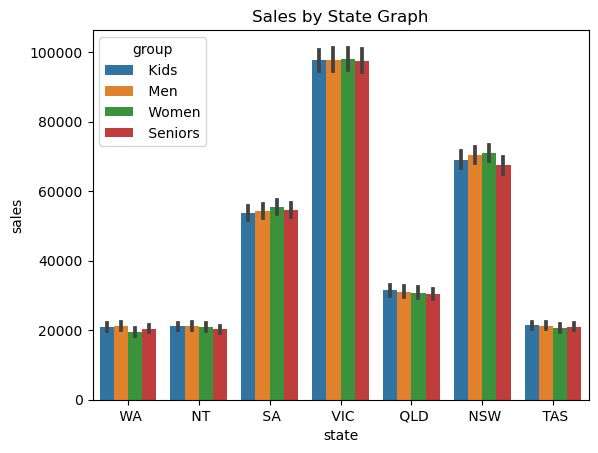

In [409]:
# Using seaborn graph to show sales in different States
state_sales =sns.barplot(data =sd,x='state',y='sales',hue ='group')
plt.title('Sales by State Graph')
state_sales

<Axes: title={'center': 'Sales by State Graph'}, xlabel='group', ylabel='sales'>

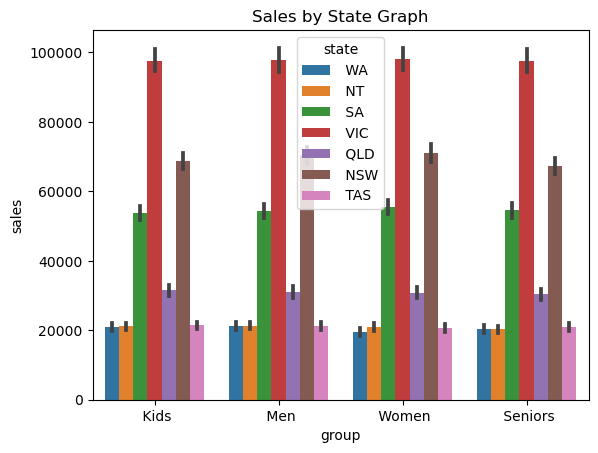

In [410]:
# Using seaborn graph to show sales in different States
state_sales =sns.barplot(data =sd,x='group',y='sales',hue ='state')
plt.title('Sales by State Graph')
state_sales

<Axes: title={'center': 'Sales by TIME Graph'}, xlabel='time', ylabel='sales'>

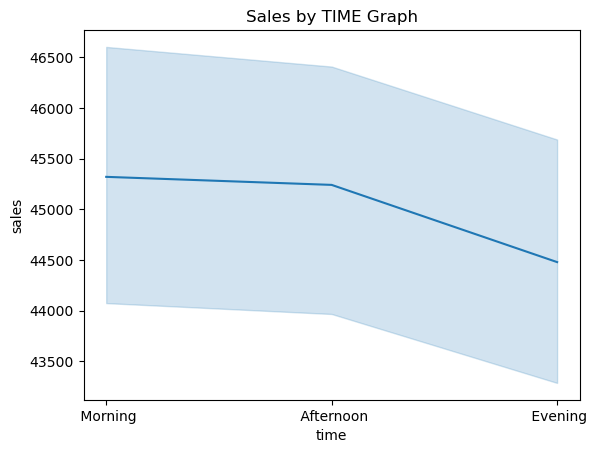

In [411]:
# Using seaborn graph to show sales in different time
time_sales =sns.lineplot(data =sd,x='time',y='sales')
plt.title('Sales by TIME Graph')
time_sales

<Axes: title={'center': 'Sales by Group Graph'}, xlabel='group', ylabel='sales'>

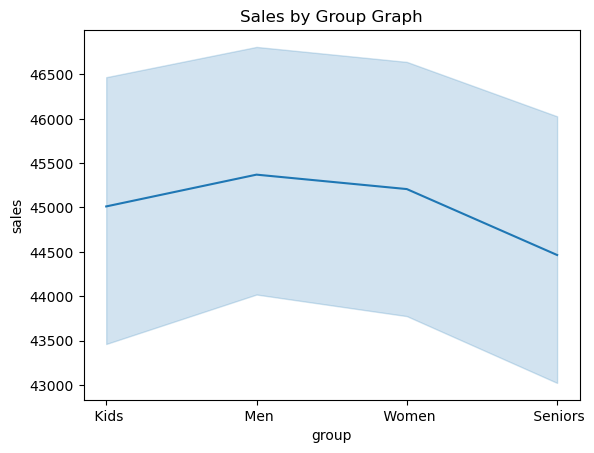

In [412]:
# Using seaborn graph to show sales in different Group
group_sales =sns.lineplot(data =sd,x='group',y='sales')
plt.title('Sales by Group Graph')
group_sales

In [413]:
sd

date        time state     group  unit  sales  normalized_unit  \
0      1-Oct-2020     Morning    WA      Kids     8  20000         0.095238   
1      1-Oct-2020     Morning    WA       Men     8  20000         0.095238   
2      1-Oct-2020     Morning    WA     Women     4  10000         0.031746   
3      1-Oct-2020     Morning    WA   Seniors    15  37500         0.206349   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500         0.015873   
...           ...         ...   ...       ...   ...    ...              ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000         0.190476   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500         0.206349   
7557  30-Dec-2020     Evening   TAS       Men    15  37500         0.206349   
7558  30-Dec-2020     Evening   TAS     Women    11  27500         0.142857   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500         0.174603   

      normalized_sales  
0             0.095238  
1             0.095238  
2             0.031746  
3             0.206349  
4             0.015873  
...                ...  
7555          0.190476  
7556          0.206349  
7557          0.206349  
7558          0.142857  
7559          0.174603  

[7560 rows x 8 columns]

In [414]:
sd.set_index('date', inplace=True)

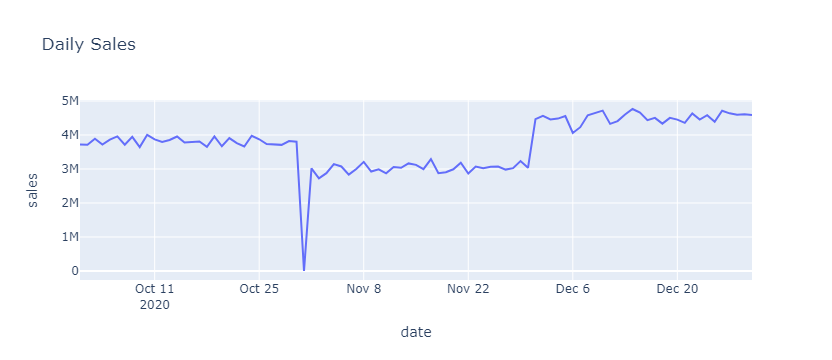

In [415]:
sd.index = pd.to_datetime(sd.index)

# Resample and plot
daily_report = sd.resample('D').sum()
daily_sale = px.line(data_frame=daily_report,
                     y=daily_report['sales'],
                     title='Daily Sales')
daily_sale.show()

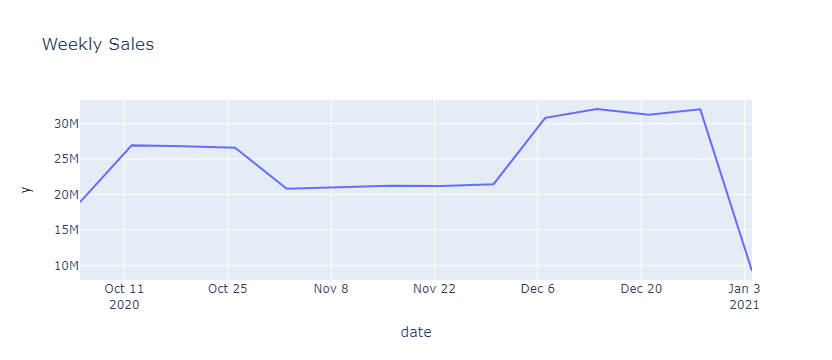

In [449]:
# Weekly Report: resample by week and start with Monday
weekly_report =sd.resample('W-MON').sum()
weekly_sale =px.line(data_frame=sd.resample('W-MON').sum(),
                     y=weekly_report['sales'],
                     title='Weekly Sales')
weekly_sale

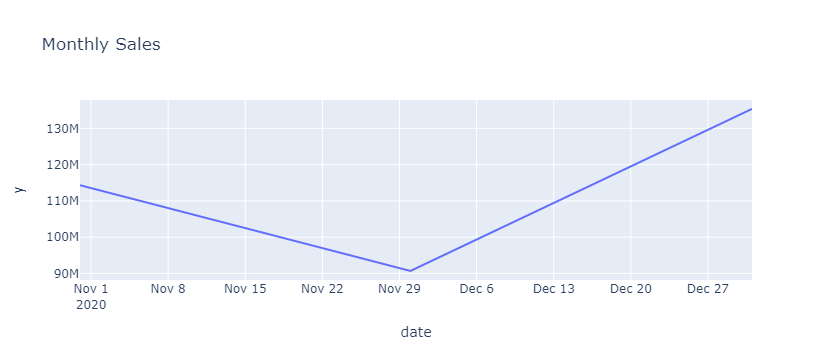

In [451]:
# Monthly Report: resample by month
monthly_report =sd.resample('M').sum()
monthly_sale =px.line(data_frame=sd.resample('M').sum(),
                      y=monthly_report['sales'],
                      title='Monthly Sales')
monthly_sale

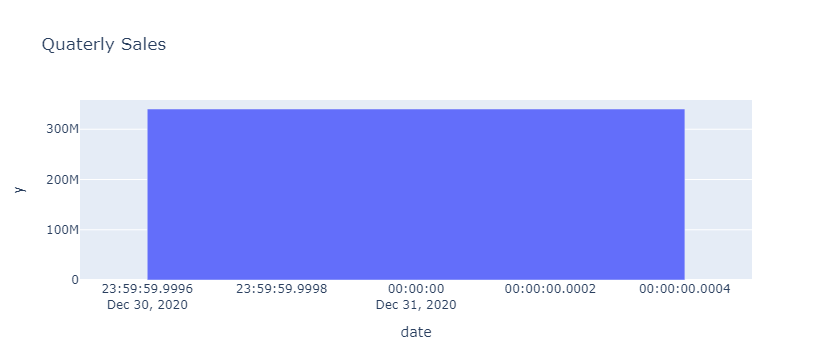

In [457]:
# Quaterly Report: resample by month
quaterly_report =sd.resample('Q').sum()
quaterly_sale =px.bar(data_frame=sd.resample('Q').sum(),
                      y=quaterly_report['sales'],
                      title='Quaterly Sales')
quaterly_sale

## Dashboard

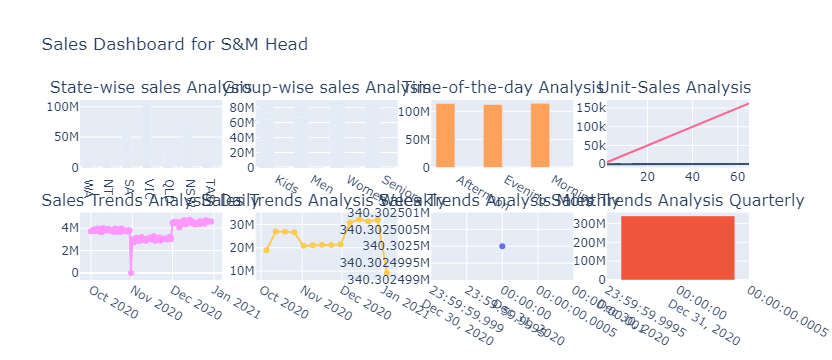

In [547]:
df_daily =sd.resample('D').sum()

# Creating the dashboard
fig =make_subplots(rows=2,cols=4,
                   #vertical_spacing=0.4,  # Adjust the vertical gap between rows
                   #horizontal_spacing=0.3, # Adjust the horizontal gap between columns
                   subplot_titles=("State-wise sales Analysis",
                                   "Group-wise sales Analysis",
                                   "Time-of-the-day Analysis",
                                   "Unit-Sales Analysis ",
                                   "Sales Trends Analysis Daily",
                                   "Sales Trends Analysis Weeakly ",
                                   "Sales Trends Analysis Monthly ",
                                   "Sales Trends Analysis Quarterly"))

# state-wise sales analysis for different groups
fig.add_trace(go.Bar(x=sd['state'],
                     y=sd['sales'],
                     name='sales',
                     marker=dict(color='rgb(34, 111, 255)')),
              row=1, col=1)
fig.add_trace(go.Bar(x=sd['state'],
                     y=sd['normalized_sales'],
                     name='Normalized sales'),
              row=1, col=1)

# group-wise sales analysis across different states
fig.add_trace(go.Bar(x=sd['group'],
                     y=sd['sales'],
                     name='sales'),
              row=1, col=2)
fig.add_trace(go.Bar(x=sd['group'],
                     y=sd['normalized_sales'],
                     name='Normalized sales',
                     marker=dict(color='rgb(55, 83, 109)')),
              row=1, col=2)

# time-of-the-day analysis
df_time_analysis =sd.groupby('time').sum().reset_index() # Aggregating data for time analysis

fig.add_trace(go.Bar(x=df_time_analysis['time'],
                     y=df_time_analysis['sales'],
                     name='sales'),
              row=1, col=3)
fig.add_trace(go.Bar(x=df_time_analysis['time'],
                     y=df_time_analysis['normalized_sales'],
                     name='Normalized sales'),
              row=1, col=3)

# unit-wise sales analysis
fig.add_trace(go.Scatter(x=sd['unit'],
                         y=sd['sales'],
                         name='sales'),
              row=1, col=4)
fig.add_trace(go.Scatter(x=sd['unit'],
                         y=sd['normalized_sales'],
                         name='Normalized sales',
                         marker=dict(color='rgb(55, 83, 109)')),
              row=1, col=4)

# Add traces for sales trends
fig.add_trace(go.Scatter(x=df_daily.index,
                         y=df_daily['sales'],
                         mode='lines+markers',
                         name='Daily sales'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=weekly_report.index,
                         y=weekly_report['sales'],
                         mode='lines+markers',
                         name='Weekly sales'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=monthly_report.index,
                         y=monthly_report['sales'],
                         mode='lines+markers',
                         name='Monthly sales'),
              row=2, col=3)
fig.add_trace(go.Bar(x=quaterly_report.index,
                     y=quaterly_report['sales'],
                     name='Quarterly sales'),
              row=2, col=4)

# Update layout
fig.update_layout(showlegend=False,
                  title_text="Sales Dashboard for S&M Head")


# Show the plots
fig.show()